In [3]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10("../yolos/yolov10/yolov10s_bs_16_extended/detect/train2/weights/best.pt")

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path="../data/images/test",
    annotations_directory_path="../data/labels/test",
    data_yaml_path="../yolos/dataset.yaml"
)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 480x640 4 damaged buildings, 187.7ms
Speed: 2.3ms preprocess, 187.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
Detections(xyxy=array([[     551.67,      243.23,      729.96,      565.53],
       [          0,     0.66753,      159.21,      231.73],
       [     566.19,      643.92,      839.28,         768],
       [     120.04,      322.43,      403.43,       726.6]], dtype=float32), mask=None, confidence=array([    0.93719,     0.93231,     0.92939,      0.5747], dtype=float32), class_id=array([1, 1, 1, 1]), tracker_id=None, data={'class_name': array(['damaged building', 'damaged building', 'damaged building', 'damaged building'], dtype='<U16')})


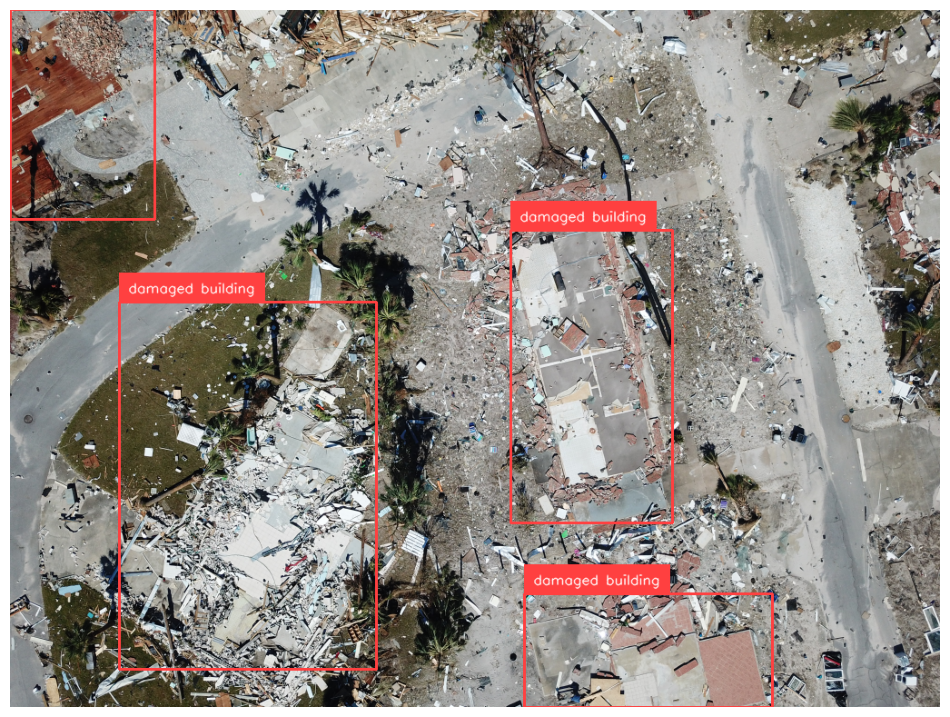

In [6]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]
# Calculate the scaling factor
scaling_factor = min(1024 / random_image.shape[1], 1024 / random_image.shape[0])

# Resize the image while maintaining aspect ratio
new_size = (int(random_image.shape[1] * scaling_factor), int(random_image.shape[0] * scaling_factor))
random_image = cv2.resize(random_image,new_size,interpolation = cv2.INTER_AREA)
results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)
print(detections)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /Users/dolphinium/anaconda3/envs/yolov10/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <F9338F3C-C897-38D4-84EB-C2CFA21569E2> /Users/dolphinium/anaconda3/envs/yolov10/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.


{34853: {0: b'\x03\x02\x00\x00', 1: 'N', 2: (29.0, 57.0, 9.153), 3: 'W', 4: (85.0, 25.0, 43.3717), 5: b'\x00', 6: 47.805}, 296: 2, 34665: 182, 270: 'DCIM\\101MEDIA\\DJI_0031.JPG', 271: 'DJI\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 272: 'FC220\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 305: 'v02.08.5668\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 274: 1, 306: '2018:10:13 13:52:04', 531: 1, 282: 72.0, 283: 72.0, 40092: b'0\x00.\x009\x00.\x001\x004\x003\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

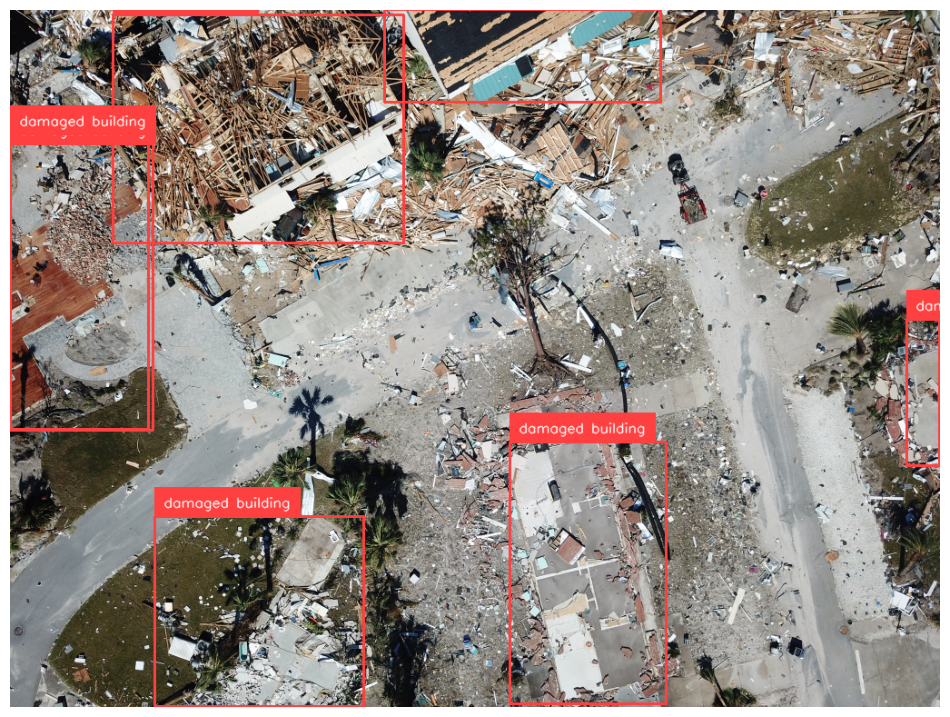

Building 1: Class: damaged building, Confidence: 0.94, Latitude: 29.952932, Longitude: -85.428407///29.952932, -85.428407 
Building 2: Class: damaged building, Confidence: 0.93, Latitude: 29.951995, Longitude: -85.428584///29.951995, -85.428584 
Building 3: Class: damaged building, Confidence: 0.78, Latitude: 29.952128, Longitude: -85.429303///29.952128, -85.429303 
Building 4: Class: damaged building, Confidence: 0.77, Latitude: 29.952414, Longitude: -85.429784///29.952414, -85.429784 
Building 5: Class: damaged building, Confidence: 0.69, Latitude: 29.953002, Longitude: -85.429300///29.953002, -85.429300 
Building 6: Class: damaged building, Confidence: 0.49, Latitude: 29.952405, Longitude: -85.429790///29.952405, -85.429790 
Building 7: Class: damaged building, Confidence: 0.26, Latitude: 29.952605, Longitude: -85.427496///29.952605, -85.427496 


In [1]:
import cv2
import supervision as sv
from ultralytics import YOLOv10
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
import random
import numpy as np

# Load the YOLOv10 model
model = YOLOv10("../yolos/yolov10/yolov10s_bs_16_extended/detect/train2/weights/best.pt")

# Load the dataset
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path="../data/images/test",
    annotations_directory_path="../data/labels/test",
    data_yaml_path="../yolos/dataset.yaml"
)

# Annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Constants
DRONE_ALTITUDE_FEET = 400  # Altitude in feet
METERS_PER_FOOT = 0.3048  # Conversion factor from feet to meters
DRONE_ALTITUDE_METERS = DRONE_ALTITUDE_FEET * METERS_PER_FOOT
EARTH_RADIUS_METERS = 6378137  # Mean radius of the Earth in meters

# Function to extract GPS metadata from an image
def get_image_metadata(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Extract EXIF data
    exif_data = img._getexif()
    print(exif_data)
    if not exif_data:
        return None

    # Map EXIF tags to readable names
    exif = {TAGS.get(tag): value for tag, value in exif_data.items()}
    
    # Extract GPS data
    gps_info = exif.get("GPSInfo")
    
    if not gps_info:
        return None
    
    # Map GPS tags to readable names
    gps_data = {GPSTAGS.get(tag): value for tag, value in gps_info.items()}
    
    # Extract latitude and longitude
    latitude = gps_data.get("GPSLatitude")
    latitude_ref = gps_data.get("GPSLatitudeRef")
    longitude = gps_data.get("GPSLongitude")
    longitude_ref = gps_data.get("GPSLongitudeRef")

    # Convert to degrees
    def convert_to_degrees(value):
        d, m, s = value
        return d + (m / 60.0) + (s / 3600.0)

    lat = convert_to_degrees(latitude)
    lon = convert_to_degrees(longitude)

    # Adjust for hemisphere
    if latitude_ref != "N":
        lat = -lat
    if longitude_ref != "E":
        lon = -lon

    return lat, lon

# Function to calculate geographic coordinates of bounding boxes
def calculate_geographic_coordinates(bbox, image_size, fov_horizontal, fov_vertical, lat, lon):
    # Image dimensions
    img_width, img_height = image_size
    
    # Bounding box coordinates
    x_min, y_min, x_max, y_max = bbox
    
    # Calculate the center of the bounding box
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    # Normalize coordinates
    x_center_norm = x_center / img_width
    y_center_norm = y_center / img_height

    # Calculate the actual width and height in meters using altitude and FOV
    horizontal_span = 2 * (DRONE_ALTITUDE_METERS * np.tan(np.radians(fov_horizontal / 2)))
    vertical_span = 2 * (DRONE_ALTITUDE_METERS * np.tan(np.radians(fov_vertical / 2)))

    # Convert normalized positions to meter offsets from the image center
    x_offset_meters = (x_center_norm - 0.5) * horizontal_span
    y_offset_meters = (y_center_norm - 0.5) * vertical_span

    # Convert meter offsets to latitude and longitude offsets
    lat_offset = (y_offset_meters / EARTH_RADIUS_METERS) * (180 / np.pi)
    lon_offset = (x_offset_meters / (EARTH_RADIUS_METERS * np.cos(np.radians(lat)))) * (180 / np.pi)

    # Calculate new latitude and longitude
    building_lat = lat + lat_offset
    building_lon = lon + lon_offset

    return building_lat, building_lon

# Select a random image
random_image_path = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image_path]

# Extract metadata
metadata = get_image_metadata(random_image_path)

if metadata:
    lat, lon = metadata
    print(f"Image Latitude: {lat}, Longitude: {lon}")
else:
    print("No GPS metadata found.")
    exit()

# Calculate the scaling factor
scaling_factor = min(1024 / random_image.shape[1], 1024 / random_image.shape[0])

# Resize the image while maintaining aspect ratio
new_size = (int(random_image.shape[1] * scaling_factor), int(random_image.shape[0] * scaling_factor))
resized_image = cv2.resize(random_image, new_size, interpolation=cv2.INTER_AREA)

# Run the YOLO model
results = model(source=resized_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)
print(detections)

# Annotate the image with bounding boxes
annotated_image = bounding_box_annotator.annotate(scene=resized_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Plot annotated image
sv.plot_image(annotated_image)

# Field of View (FOV) of the camera
FOV_HORIZONTAL = 90  # Horizontal field of view in degrees
FOV_VERTICAL = 60    # Vertical field of view in degrees

# Calculate and display geographic coordinates of each detected building
for i, bbox in enumerate(detections.xyxy):
    building_lat, building_lon = calculate_geographic_coordinates(bbox, new_size, FOV_HORIZONTAL, FOV_VERTICAL, lat, lon)
    confidence = detections.confidence[i]
    class_name = detections.data['class_name'][i]
    print(f"Building {i+1}: Class: {class_name}, Confidence: {confidence:.2f}, Latitude: {building_lat:.6f}, Longitude: {building_lon:.6f}///{building_lat:.6f}, {building_lon:.6f} ")

In [8]:
%pip install piexif

Note: you may need to restart the kernel to use updated packages.


In [9]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
import piexif

def get_exif_data(image_path):
    # Open image using PIL
    img = Image.open(image_path)
    
    # Extract EXIF data
    exif_data = img._getexif()

    # Translate EXIF data into human-readable form
    exif_dict = {}
    if exif_data is not None:
        for tag, value in exif_data.items():
            decoded_tag = TAGS.get(tag, tag)
            exif_dict[decoded_tag] = value
            
    return exif_dict

def extract_dji_exif(exif_data):
    # Function to extract specific DJI-related EXIF data
    dji_info = {}
    
    # DJI specific tag ids for gimbal and heading angles
    DJI_TAGS = {
        37500: 'DJI_MakerNote',
        40092: 'GimbalPitchDegree',
        40093: 'GimbalRollDegree',
        40094: 'GimbalYawDegree',
        40095: 'CameraPitchDegree',
        40096: 'CameraRollDegree',
        40097: 'CameraYawDegree',
        40965: 'SubIFD'
    }
    
    for tag, value in exif_data.items():
        if tag in DJI_TAGS:
            tag_name = DJI_TAGS[tag]
            if isinstance(value, bytes):
                # Decode bytes if necessary
                try:
                    value = value.decode('utf-8', errors='ignore')
                except:
                    value = str(value)
            dji_info[tag_name] = value
    
    # Extract GPS Info
    if 'GPSInfo' in exif_data:
        gps_info = {}
        for key in exif_data['GPSInfo'].keys():
            decoded_key = GPSTAGS.get(key, key)
            gps_info[decoded_key] = exif_data['GPSInfo'][key]
        dji_info['GPSInfo'] = gps_info
    
    return dji_info

def extract_gimbal_and_heading(image_path):
    exif_data = get_exif_data(image_path)
    dji_data = extract_dji_exif(exif_data)
    
    # Print relevant DJI information
    print("DJI EXIF Data:")
    for key, value in dji_data.items():
        print(f"{key}: {value}")

    # Extract specific angles
    gimbal_pitch = dji_data.get('GimbalPitchDegree', 'Not Available')
    gimbal_roll = dji_data.get('GimbalRollDegree', 'Not Available')
    gimbal_yaw = dji_data.get('GimbalYawDegree', 'Not Available')
    camera_pitch = dji_data.get('CameraPitchDegree', 'Not Available')
    camera_roll = dji_data.get('CameraRollDegree', 'Not Available')
    camera_yaw = dji_data.get('CameraYawDegree', 'Not Available')
    
    print("\nExtracted Gimbal Angles:")
    print(f"Gimbal Pitch: {gimbal_pitch}")
    print(f"Gimbal Roll: {gimbal_roll}")
    print(f"Gimbal Yaw: {gimbal_yaw}")
    
    print("\nExtracted Camera Angles:")
    print(f"Camera Pitch: {camera_pitch}")
    print(f"Camera Roll: {camera_roll}")
    print(f"Camera Yaw: {camera_yaw}")
    
    # Extract GPS Data
    if 'GPSInfo' in dji_data:
        gps_info = dji_data['GPSInfo']
        print("\nExtracted GPS Data:")
        for key, value in gps_info.items():
            print(f"{key}: {value}")

# Sample image path
sample_image_path = "../data/raw_data/test/test-org-img/10794.jpg"
extract_gimbal_and_heading(sample_image_path)

DJI EXIF Data:
GPSInfo: {'GPSVersionID': b'\x03\x02\x00\x00', 'GPSLatitudeRef': 'N', 'GPSLatitude': (29.0, 57.0, 3.0682), 'GPSLongitudeRef': 'W', 'GPSLongitude': (85.0, 25.0, 46.4073), 'GPSAltitudeRef': b'\x00', 'GPSAltitude': 47.805}

Extracted Gimbal Angles:
Gimbal Pitch: Not Available
Gimbal Roll: Not Available
Gimbal Yaw: Not Available

Extracted Camera Angles:
Camera Pitch: Not Available
Camera Roll: Not Available
Camera Yaw: Not Available

Extracted GPS Data:
GPSVersionID: b'\x03\x02\x00\x00'
GPSLatitudeRef: N
GPSLatitude: (29.0, 57.0, 3.0682)
GPSLongitudeRef: W
GPSLongitude: (85.0, 25.0, 46.4073)
GPSAltitudeRef: b'\x00'
GPSAltitude: 47.805


In [10]:
%pip install pillow exifread piexif

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 401.5 kB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
import exifread
import piexif
import struct

def get_exif_data(image_path):
    # Open image using PIL
    img = Image.open(image_path)
    
    # Extract EXIF data
    exif_data = img._getexif()

    # Use piexif for additional XMP data if necessary
    xmp_data = piexif.load(img.info.get('xml', b''))
    
    return exif_data, xmp_data

def extract_dji_makernote_tags(exif_data):
    # Extract DJI MakerNote and other relevant EXIF data
    dji_info = {}

    for tag, value in exif_data.items():
        if isinstance(value, bytes):
            try:
                value = value.decode('utf-8', errors='ignore')
            except:
                value = str(value)

        if tag == 37500:  # DJI MakerNote
            # Parse the DJI MakerNote
            maker_note = value
            dji_info.update(parse_dji_makernote(maker_note))
    
    return dji_info

def parse_dji_makernote(maker_note):
    # Parse the MakerNote based on known DJI format
    dji_data = {}
    
    if isinstance(maker_note, bytes):
        maker_note = maker_note.decode('utf-8', errors='ignore')

    # Extract angles
    try:
        # Extract Pitch, Yaw, Roll for both gimbal and camera
        pitch_tag_id = maker_note.find('Pitch')
        yaw_tag_id = maker_note.find('Yaw')
        roll_tag_id = maker_note.find('Roll')

        if pitch_tag_id != -1:
            dji_data['GimbalPitchDegree'] = float(maker_note[pitch_tag_id + 5:pitch_tag_id + 12].strip())
        if yaw_tag_id != -1:
            dji_data['GimbalYawDegree'] = float(maker_note[yaw_tag_id + 3:yaw_tag_id + 10].strip())
        if roll_tag_id != -1:
            dji_data['GimbalRollDegree'] = float(maker_note[roll_tag_id + 4:roll_tag_id + 11].strip())
    except Exception as e:
        print(f"Error parsing DJI MakerNote: {e}")
    
    return dji_data

def extract_dji_xmp_data(xmp_data):
    # Extract DJI-specific XMP tags
    dji_info = {}
    
    # Check for DJI XMP data
    for key in xmp_data:
        if 'drone-dji' in key:
            drone_data = xmp_data[key]
            for tag, value in drone_data.items():
                tag_name = tag[1] if isinstance(tag, tuple) else tag
                dji_info[tag_name] = value

    return dji_info

def extract_gimbal_and_heading(image_path):
    exif_data, xmp_data = get_exif_data(image_path)
    
    # Extract DJI MakerNote data
    dji_makernote_data = extract_dji_makernote_tags(exif_data)
    
    # Extract DJI XMP data
    dji_xmp_data = extract_dji_xmp_data(xmp_data)
    
    # Combine data
    dji_data = {**dji_makernote_data, **dji_xmp_data}
    
    # Print relevant DJI information
    print("DJI EXIF Data:")
    for key, value in dji_data.items():
        print(f"{key}: {value}")

    # Extract specific angles
    gimbal_pitch = dji_data.get('GimbalPitchDegree', 'Not Available')
    gimbal_roll = dji_data.get('GimbalRollDegree', 'Not Available')
    gimbal_yaw = dji_data.get('GimbalYawDegree', 'Not Available')
    camera_pitch = dji_data.get('CameraPitch', 'Not Available')
    camera_roll = dji_data.get('CameraRoll', 'Not Available')
    camera_yaw = dji_data.get('CameraYaw', 'Not Available')
    
    print("\nExtracted Gimbal Angles:")
    print(f"Gimbal Pitch: {gimbal_pitch}")
    print(f"Gimbal Roll: {gimbal_roll}")
    print(f"Gimbal Yaw: {gimbal_yaw}")
    
    print("\nExtracted Camera Angles:")
    print(f"Camera Pitch: {camera_pitch}")
    print(f"Camera Roll: {camera_roll}")
    print(f"Camera Yaw: {camera_yaw}")

# Sample image path
sample_image_path = "../data/raw_data/test/test-org-img/10794.jpg"
extract_gimbal_and_heading(sample_image_path)

FileNotFoundError: [Errno 2] No such file or directory: b''

In [7]:
sample_image_path = "../data/raw_data/train/train-org-img/10778.jpg"
img = Image.open(sample_image_path)

# Extract EXIF data
exif_data = img._getexif()
exif_data

{34853: {0: b'\x03\x02\x00\x00',
  1: 'N',
  2: (29.0, 57.0, 10.9994),
  3: 'W',
  4: (85.0, 25.0, 40.9357),
  5: b'\x00',
  6: 47.705},
 296: 2,
 34665: 182,
 270: 'DCIM\\101MEDIA\\DJI_0001.JPG',
 271: 'DJI\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 272: 'FC220\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 305: 'v02.08.5668\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 274: 1,
 306: '2018:10:13 13:50:45',
 531: 1,
 282: 72.0,
 283: 72.0,
 40092: b'0\x00.\x009\x00.\x001\x004\x003\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /Users/dolphinium/anaconda3/envs/yolov10/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <F9338F3C-C897-38D4-84EB-C2CFA21569E2> /Users/dolphinium/anaconda3/envs/yolov10/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 480x640 2 undamaged buildings, 5 damaged buildings, 203.2ms
Speed: 5.0ms preprocess, 203.2ms inference, 8.6ms postprocess per image at shape (1, 3, 480, 640)
Detections(xyxy=array([[      347.6,      341.75,      464.32,      568.98],
       [     916.16,      421.43,      1023.3,      695.22],
       [     936.24,      122.51,      1023.3,       381.5],
       [     127.78,      488.73,      309.58,       719.1],
       [     358.19,      49.148,      677.81,      298.72],
       [     357.63,      48.407,      679.79,         298],
       [    0.23188,      137.59,      80.198,      285.91]], dtype=float32), mask=None, confidence=array([    0.95374,      0.9493,     0.93218,     0.92958,     0.91547,        0.49,     0.40546], dtype=float32), class_id=array([1, 0, 0, 1, 1, 1, 1]), tracker_id=None, data={'class_name': array(['damaged building', 'undamaged building', 'undamaged building', 'damaged building', 'damaged building', 'damaged building', 'damaged building'], dtype='<U18')

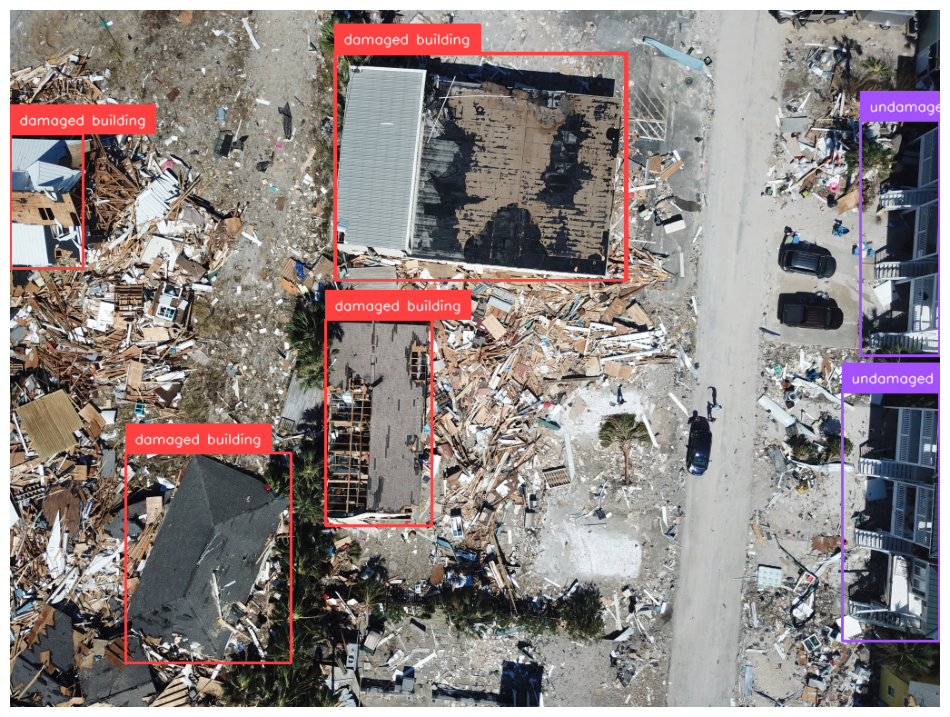

Building 1: Class: damaged building, Confidence: 0.95, Latitude: 99.163767, Longitude: -85.427150
Building 2: Class: undamaged building, Confidence: 0.95, Latitude: 99.446960, Longitude: -85.427150
Building 3: Class: undamaged building, Confidence: 0.93, Latitude: 99.722751, Longitude: -85.427150
Building 4: Class: damaged building, Confidence: 0.93, Latitude: 98.973848, Longitude: -85.427150
Building 5: Class: damaged building, Confidence: 0.92, Latitude: 99.427641, Longitude: -85.427150
Building 6: Class: damaged building, Confidence: 0.49, Latitude: 99.428573, Longitude: -85.427150
Building 7: Class: damaged building, Confidence: 0.41, Latitude: 99.166153, Longitude: -85.427150


In [8]:
import cv2
import supervision as sv
from ultralytics import YOLOv10
import random
import numpy as np
from math import radians, tan, cos, sin, sqrt, atan2

# Load the YOLOv10 model
model = YOLOv10("../yolos/yolov10/yolov10s_bs_16_extended/detect/train2/weights/best.pt")

# Load the dataset
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path="../data/images/test",
    annotations_directory_path="../data/labels/test",
    data_yaml_path="../yolos/dataset.yaml"
)

# Annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Constants
EARTH_RADIUS_METERS = 6378137  # Mean radius of the Earth in meters

# Metadata from image file
DRONE_ALTITUDE_METERS = 47.705  # Altitude above sea level in meters
RELATIVE_ALTITUDE_METERS = 60.80  # Relative altitude of the drone in meters
CAMERA_PITCH_DEGREE = -90.00  # Camera pitch in degrees
CAMERA_YAW_DEGREE = -148.00  # Camera yaw in degrees
CAMERA_ROLL_DEGREE = +179.90  # Camera roll in degrees
CALIBRATED_FOCAL_LENGTH = 3032.258057  # Calibrated focal length
OPTICAL_CENTER_X = 2000.000000  # Optical center X
OPTICAL_CENTER_Y = 1500.000000  # Optical center Y

# Image GPS coordinates
IMAGE_LATITUDE = 29.953056  # 29 deg 57' 11.00" converted to decimal
IMAGE_LONGITUDE = -85.427150  # 85 deg 25' 40.94" converted to decimal

# Field of View (FOV) for FC220 camera
FOV_HORIZONTAL = 78.8  # Horizontal FOV in degrees
FOV_VERTICAL = 50.6    # Vertical FOV in degrees

# Function to calculate distance between two GPS coordinates
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = EARTH_RADIUS_METERS * c

    return distance

# Function to calculate new GPS coordinates given a starting point, distance, and bearing
def calculate_new_coordinates(lat, lon, distance, bearing):
    # Convert latitude and longitude from degrees to radians
    lat = radians(lat)
    lon = radians(lon)
    bearing = radians(bearing)

    # Calculate the new latitude and longitude
    new_lat = atan2(sin(lat) * cos(distance / EARTH_RADIUS_METERS) +
                    cos(lat) * sin(distance / EARTH_RADIUS_METERS) * cos(bearing),
                    cos(distance / EARTH_RADIUS_METERS) * sin(bearing))
    new_lon = lon + atan2(sin(bearing) * sin(distance / EARTH_RADIUS_METERS) * cos(lat),
                          cos(distance / EARTH_RADIUS_METERS) - sin(lat) * sin(new_lat))

    # Convert latitude and longitude from radians to degrees
    new_lat = np.degrees(new_lat)
    new_lon = np.degrees(new_lon)

    return new_lat, new_lon

# Function to calculate geographic coordinates of bounding boxes
def calculate_geographic_coordinates(bbox, image_size, fov_horizontal, fov_vertical, lat, lon):
    # Image dimensions
    img_width, img_height = image_size
    
    # Bounding box coordinates
    x_min, y_min, x_max, y_max = bbox
    
    # Calculate the center of the bounding box
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    # Normalize coordinates
    x_center_norm = (x_center - OPTICAL_CENTER_X) / CALIBRATED_FOCAL_LENGTH
    y_center_norm = (y_center - OPTICAL_CENTER_Y) / CALIBRATED_FOCAL_LENGTH

    # Calculate the actual width and height in meters using relative altitude and FOV
    horizontal_span = 2 * (RELATIVE_ALTITUDE_METERS * tan(radians(fov_horizontal / 2)))
    vertical_span = 2 * (RELATIVE_ALTITUDE_METERS * tan(radians(fov_vertical / 2)))

    # Convert normalized positions to meter offsets from the image center
    x_offset_meters = x_center_norm * horizontal_span / img_width
    y_offset_meters = y_center_norm * vertical_span / img_height

    # Calculate distance and bearing
    distance = sqrt(x_offset_meters ** 2 + y_offset_meters ** 2)
    bearing = atan2(x_offset_meters, y_offset_meters) + radians(CAMERA_YAW_DEGREE)

    # Calculate new latitude and longitude
    building_lat, building_lon = calculate_new_coordinates(lat, lon, distance, bearing)

    return building_lat, building_lon

# Select a random image
random_image_path = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image_path]

# Calculate the scaling factor
scaling_factor = min(1024 / random_image.shape[1], 1024 / random_image.shape[0])

# Resize the image while maintaining aspect ratio
new_size = (int(random_image.shape[1] * scaling_factor), int(random_image.shape[0] * scaling_factor))
resized_image = cv2.resize(random_image, new_size, interpolation=cv2.INTER_AREA)

# Run the YOLO model
results = model(source=resized_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)
print(detections)

# Annotate the image with bounding boxes
annotated_image = bounding_box_annotator.annotate(scene=resized_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Plot annotated image
sv.plot_image(annotated_image)

# Calculate and display geographic coordinates of each detected building
for i, bbox in enumerate(detections.xyxy):
    building_lat, building_lon = calculate_geographic_coordinates(bbox, new_size, FOV_HORIZONTAL, FOV_VERTICAL, IMAGE_LATITUDE, IMAGE_LONGITUDE)
    confidence = detections.confidence[i]
    class_name = detections.data['class_name'][i]
    print(f"Building {i+1}: Class: {class_name}, Confidence: {confidence:.2f}, Latitude: {building_lat:.6f}, Longitude: {building_lon:.6f}")

In [9]:
%pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 715.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.


['../data/images/test/10849.jpg', '../data/images/test/11038.jpg', '../data/images/test/10801.jpg', '../data/images/test/10807.jpg', '../data/images/test/10838.jpg', '../data/images/test/10794.jpg', '../data/images/test/10808.jpg', '../data/images/test/10836.jpg', '../data/images/test/10856.jpg', '../data/images/test/10844.jpg', '../data/images/test/10890.jpg']


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 480x640 6 damaged buildings, 269.1ms
Speed: 3.0ms preprocess, 269.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Detections(xyxy=array([[     1611.5,     0.55103,      2788.4,      396.52],
       [     445.22,      28.247,      1692.8,        1004],
       [     2145.6,      1840.1,      2792.6,      2983.6],
       [          0,       516.6,      595.33,      1795.8],
       [     3867.8,      1416.5,      3997.5,      1962.2],
       [     655.41,      2194.7,        1512,      2999.3]], dtype=float32), mask=None, confidence=array([    0.92817,     0.91764,     0.90529,     0.68162,     0.34598,      0.2761], dtype=float32), class_id=array([1, 1, 1, 1, 1, 1]), tracker_id=None, data={'class_name': array(['damaged building', 'damaged building', 'damaged building', 'damaged building', 'damaged building', 'damaged building'], dtype='<U16')})


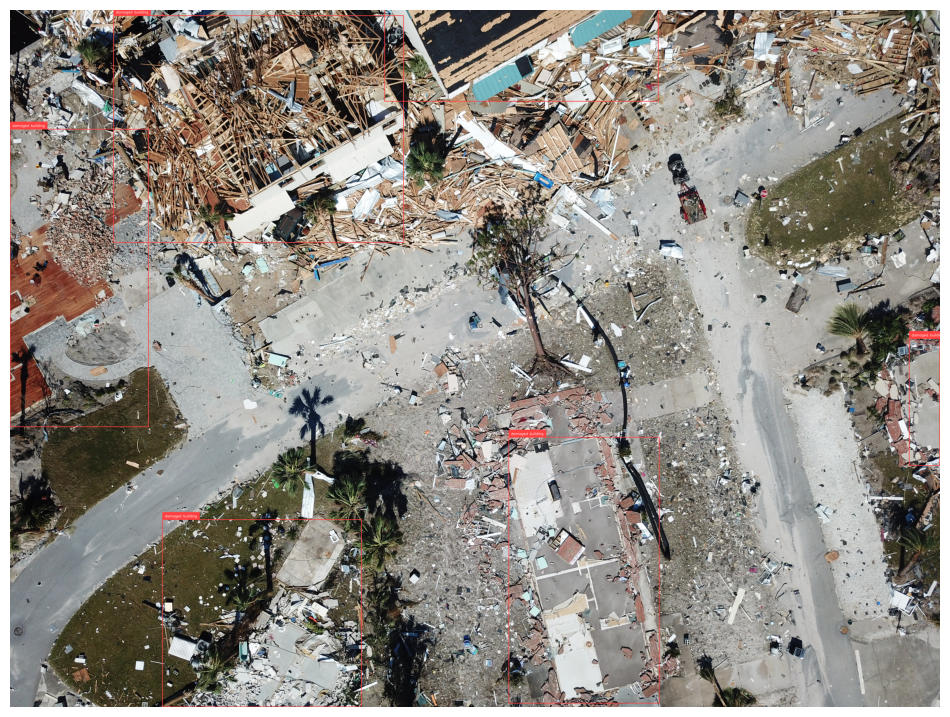

Building 1: Latitude: 29.95276150704742, Longitude: -85.42881443757743  // 29.95276150704742, -85.42881443757743
Building 2: Latitude: 29.9526015143293, Longitude: -85.4289931689884  // 29.9526015143293, -85.4289931689884
Building 3: Latitude: 29.952447565696307, Longitude: -85.42852901543478  // 29.952447565696307, -85.42852901543478
Building 4: Latitude: 29.952427260048136, Longitude: -85.42907013382938  // 29.952427260048136, -85.42907013382938
Building 5: Latitude: 29.952702528183277, Longitude: -85.42833077347909  // 29.952702528183277, -85.42833077347909
Building 6: Latitude: 29.952282925363523, Longitude: -85.42876959495413  // 29.952282925363523, -85.42876959495413


[(29.95276150704742, -85.42881443757743),
 (29.9526015143293, -85.4289931689884),
 (29.952447565696307, -85.42852901543478),
 (29.952427260048136, -85.42907013382938),
 (29.952702528183277, -85.42833077347909),
 (29.952282925363523, -85.42876959495413)]

In [15]:
import cv2
import numpy as np
import supervision as sv
from ultralytics import YOLOv10
from geopy.distance import geodesic
import random

# Constants
IMAGE_WIDTH = 4000
IMAGE_HEIGHT = 3000
FOV_HORIZONTAL = 69.4
FOV_VERTICAL = FOV_HORIZONTAL * (IMAGE_HEIGHT / IMAGE_WIDTH)  # Assuming square pixels

# Camera position and orientation from metadata
CAMERA_GPS = (29.9525417,-85.4287138888889)  # Latitude, Longitude
ABSOLUTE_ALTITUDE = 48.01  # meters
RELATIVE_ALTITUDE = 61.10  # meters
GIMBAL_YAW_DEGREE = +31.00  # degrees
GIMBAL_PITCH_DEGREE = -89.90  # degrees (camera facing down)

# Convert degrees to radians for calculations
yaw_rad = np.radians(GIMBAL_YAW_DEGREE)
pitch_rad = np.radians(GIMBAL_PITCH_DEGREE)

# Load YOLO model
model = YOLOv10("../yolos/yolov10/yolov10s_bs_16_extended/detect/train2/weights/best.pt")

# Load the dataset
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path="../data/images/test",
    annotations_directory_path="../data/labels/test",
    data_yaml_path="../yolos/dataset.yaml"
)

# Annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Select a random image from the dataset
#random_image = random.choice(list(dataset.images.keys()))
#random_image = dataset.images[random_image]

print(list(dataset.images.keys()))

random_image = dataset.images["../data/images/test/10808.jpg"]


# Calculate the scaling factor
#scaling_factor = min(1024 / random_image.shape[1], 1024 / random_image.shape[0])

# Resize the image while maintaining aspect ratio
#new_size = (int(random_image.shape[1] * scaling_factor), int(random_image.shape[0] * scaling_factor))
#random_image = cv2.resize(random_image, new_size, interpolation=cv2.INTER_AREA)

# Get predictions
results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

# Display detections
print(detections)

# Annotate image
annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Plot the annotated image
sv.plot_image(annotated_image)

# Function to calculate ground distance from pixel distance
def calculate_ground_distance(altitude, fov_deg, image_dimension, pixel_distance):
    # Convert FOV to radians
    fov_rad = np.radians(fov_deg)
    # Calculate ground distance
    ground_distance = (2 * altitude * np.tan(fov_rad / 2)) * (pixel_distance / image_dimension)
    return ground_distance

# Function to get GPS coordinates from offsets
def get_gps_coordinates(lat, lon, north_offset, east_offset):
    # Calculate new latitude and longitude
    new_location = geodesic(meters=north_offset).destination((lat, lon), 0)
    new_location = geodesic(meters=east_offset).destination(new_location, 90)
    return new_location.latitude, new_location.longitude

building_locations = list()
# Process each detection
for i, box in enumerate(detections.xyxy):
    # Extract bounding box coordinates
    x_min, y_min, x_max, y_max = box
    
    # Calculate the center of the bounding box
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2

    # Calculate distances
    pixel_distance_x = x_center - IMAGE_WIDTH / 2
    pixel_distance_y = IMAGE_HEIGHT / 2 - y_center

    # Convert pixel distances to real world distances
    ground_distance_x = calculate_ground_distance(RELATIVE_ALTITUDE, FOV_HORIZONTAL, IMAGE_WIDTH, pixel_distance_x)
    ground_distance_y = calculate_ground_distance(RELATIVE_ALTITUDE, FOV_VERTICAL, IMAGE_HEIGHT, pixel_distance_y)

    # Adjust for camera orientation (yaw)
    east_offset = ground_distance_x * np.cos(yaw_rad) - ground_distance_y * np.sin(yaw_rad)
    north_offset = ground_distance_x * np.sin(yaw_rad) + ground_distance_y * np.cos(yaw_rad)

    # Get building GPS coordinates
    building_lat, building_lon = get_gps_coordinates(CAMERA_GPS[0], CAMERA_GPS[1], north_offset, east_offset)
    building_locations.append((building_lat,building_lon))
    # Print building location
    print(f"Building {i+1}: Latitude: {building_lat}, Longitude: {building_lon}  // {building_lat}, {building_lon}")

building_locations

In [9]:
%pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 863.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium

# Create a Folium map centered at the camera's GPS position with satellite tiles
map_center = CAMERA_GPS
m = folium.Map(
    location=map_center,
    zoom_start=18,  # Increase zoom level for closer view
    tiles='Esri.WorldImagery'  # Use Esri's World Imagery for satellite view
)

# Iterate over each building's GPS coordinates and add a marker
for i, (building_lat, building_lon) in enumerate(building_locations):  # building_locations contains tuples of (latitude, longitude)
    # Determine the building's status based on class_id
    building_status = 'Damaged' if detections.class_id[i] == 1 else 'Undamaged'
    
    # Create a marker for each building
    folium.Marker(
        location=(building_lat, building_lon),
        popup=f'Building {i+1}: {building_status}',
        icon=folium.Icon(color='red' if building_status == 'Damaged' else 'green', icon='home')
    ).add_to(m)

# Display the map (Jupyter Notebook) or save to an HTML file
m.save('detected_buildings_satellite_map.html')
m